## <center> Análise Exploratória

In [1]:
# Preparando ambiente e importando bibliotecas necessárias
import pandas as pd
pd.set_option('display.max_columns', None) # Para ver todas as colunas

#### Importando e ajustando o dataframe

In [2]:
import os

# Mostra o diretório de trabalho atual
print(os.getcwd())

c:\Users\JPCONCEICAO\OneDrive - Suzano S A\Coding\PROJETO_RECOMENDADOR_CLONAL\notebooks


In [3]:
path1 = '..\\data\\raw\\zfl76.XLSX'
zfl76 = pd.read_excel(path1) # Relatório da transação SAP que faz a gestão logistica de madeira

path2 = '..\\data\\raw\\cadastro.xlsx'
cadastro = pd.read_excel(path2) # Base de informações das UPs

In [4]:
zfl76.rename(columns={"UP":"UP2"}, inplace=True)

In [5]:
zfl76["UP"] = zfl76['TpDepOGM'] + zfl76['UP2']

Unificando as bases

In [6]:
df = pd.merge(zfl76, cadastro, on='UP', how='left')

#### Feature Selection

In [7]:
# Variáveis a utilizar - Preditor de produtividade
columns = ['Região','Material Genético','Volume','Densidade', 'UP','Altitude','Area Útil','(%) Mortas', '(%) Falhas','Manejo Atual','Município','Zona Climática', 'Id Floresta','Espaçamento']
df_prod = df[columns]

#### Tratamento de Dados Ausentes: Imputação ou remoção de valores ausentes.

In [8]:
df_prod.isna().sum()

Região                   0
Material Genético        0
Volume                   0
Densidade                0
UP                       0
Altitude              9677
Area Útil             9677
(%) Mortas           65477
(%) Falhas           65477
Manejo Atual          9677
Município             9677
Zona Climática        9677
Id Floresta              0
Espaçamento           9677
dtype: int64

In [9]:
#Excluindo colunas com todos os valores vazios
df = df.dropna(axis=1, how='all')

In [10]:
# Preenchendo valores faltantes com 0
df_prod[['(%) Mortas','(%) Falhas']] = df_prod[['(%) Mortas','(%) Falhas']].fillna(0)

In [11]:
# Consolidando o volume total por UP
df_vol = df_prod.groupby(['UP'], as_index=False).agg({'Volume':'sum'})
df_prod = pd.merge(df_vol, df_prod[['Região', 'Material Genético', 'Densidade', 'UP', 'Altitude', 'Area Útil',
                                     'Espaçamento', 'Id Floresta', 'Manejo Atual', 'Município', 'Zona Climática',
                                     '(%) Mortas', '(%) Falhas']], 
                     on='UP', how='left').drop_duplicates(subset="UP")

In [12]:
df_prod.isna().sum()

UP                     0
Volume                 0
Região                 0
Material Genético      0
Densidade              0
Altitude             123
Area Útil            123
Espaçamento          123
Id Floresta            0
Manejo Atual         123
Município            123
Zona Climática       123
(%) Mortas             0
(%) Falhas             0
dtype: int64

In [13]:
# Removendo linhas com valores nulos
df_prod = df_prod.dropna(subset=['Altitude'])

In [14]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1441 entries, 0 to 148853
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UP                 1441 non-null   object 
 1   Volume             1441 non-null   float64
 2   Região             1441 non-null   object 
 3   Material Genético  1441 non-null   object 
 4   Densidade          1441 non-null   float64
 5   Altitude           1441 non-null   float64
 6   Area Útil          1441 non-null   float64
 7   Espaçamento        1441 non-null   object 
 8   Id Floresta        1441 non-null   float64
 9   Manejo Atual       1441 non-null   object 
 10  Município          1441 non-null   object 
 11  Zona Climática     1441 non-null   object 
 12  (%) Mortas         1441 non-null   float64
 13  (%) Falhas         1441 non-null   float64
dtypes: float64(7), object(7)
memory usage: 168.9+ KB


In [15]:
df_prod.head()

,UP,Volume,Região,Material Genético,Densidade,Altitude,Area Útil,Espaçamento,Id Floresta,Manejo Atual,Município,Zona Climática,(%) Mortas,(%) Falhas
0,I1AB09,3688.15,MA,SUZMA2019,495.66,212.0,31.68,INDEFINIDO,5.79,REFORMA,ESTREITO,M5,0.00,0.00
60,I1AE01,5088.81,MA,SUZMA2019,496.07,208.0,51.01,300X330,5.70,CONDUÇÃO,ESTREITO,M5,0.00,0.00
146,I1AE03,4404.00,MA,SUZMA2019,490.86,187.0,47.98,300X330,5.70,CONDUÇÃO,ESTREITO,M5,0.00,0.00
216,I1AF01,4228.73,MA,SUZMA2019,513.60,218.0,34.75,300X330,5.02,CONDUÇÃO,ESTREITO,M5,0.04,0.00
279,I1AF02,6490.57,MA,SUZMA2025,559.88,232.0,49.95,300X330,5.03,CONDUÇÃO,ESTREITO,M5,0.07,0.02


Explicação das variáveis

In [16]:
# Cria um dicionário com a descrição de cada variável
df_dict = {
    "UP": "Unidade de Produção: subdivisão de um imóvel rural, delimitada de acordo com critérios técnicos e operacionais como: como tipo de solo, espécies de árvores, topografia, e condições climáticas.",
    "Volume": "Quantidade de madeira em m³ transportado de uma determinada UP",
    "Região": "Estado Origem",
    "Material Genético": "Clone plantado",
    "Densidade": "Medida relativa ao peso dividido por volume (kg/m³)",
    "Altitude": "Elevação da UP em relação ao nível do mar",
    "Area Útil": "Extensão da UP em m²",
    "Espaçamento": "Distancia entre plantas na linha e entre linhas",
    "Id Floresta": "Idade da floresta",
    "Manejo Atual": "Tipo de manejo silvicultural, podendo ser Reforma (Quando há o plantio de mudas) ou condução (quando é cultivada a brotação da cepa do ciclo anterior)",
    "Município": "Cidade onde a fazenda está localizada, pode trazer outras informaçãoes edafoclimática não discriminadas por outro atributo aqui",
    "Zona Climática": "Classificação conforme caracteristicas climáticas",
    "(%) Mortas": "Quantificação relativa de mudas mortas",
    "(%) Falhas": "Quantificação relativa de áreas sem mudas"
}

### Feature Engineering

In [17]:
# Criar volume médio/HA
df_prod['avg_vol/ha'] = df_prod['Volume']/df_prod['Area Útil']

In [18]:
# Removendo coluna 'Area Útil' (redundante coom avg_vol/ha) e 'UP' (valor único por linha)
df_prod.drop(columns=['Area Útil','UP'], inplace=True)

#### Separando o DF em treino e Teste

Como não há uma resposta certa, ou seja, buscamos um recomendador que maximize a produtividade considerando as variáveis independentes, não há porque separar o conjunto em treino e teste.

## EDA

#### DataViz

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

 Distribuições

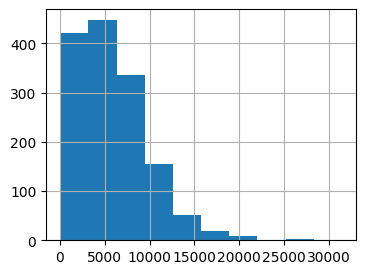

In [20]:
# Plot do histograma do volume (variável quantitativa)
df_prod['Volume'].hist(figsize=(4,3));

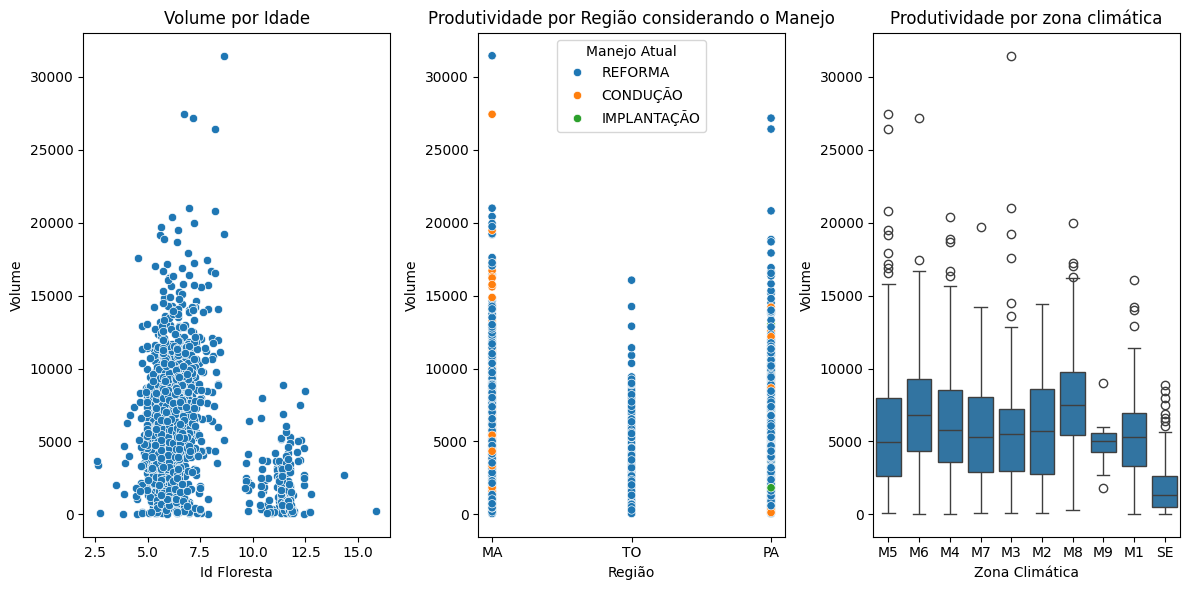

In [21]:
# Criando uma figura com 2x2 subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Primeiro subplot
sns.scatterplot(data=df_prod, x="Id Floresta", y="Volume", ax=axs[0])
axs[0].set_title("Volume por Idade")

# Segundo subplot
sns.scatterplot(data=df_prod, x="Região", y="Volume", hue="Manejo Atual", ax=axs[1])
axs[1].set_title("Produtividade por Região considerando o Manejo")

# Terceiro subplot
sns.boxplot(data=df_prod, x="Zona Climática", y='Volume', ax=axs[2])
axs[2].set_title("Produtividade por zona climática")

# Ajustando o layout para que os gráficos não se sobreponham
plt.tight_layout()
plt.show()

OBS.: Apesar da engenharia de features ser etapa do pré-processamento, vamos criar uma nova variável aqui que será essencial para avaliarmos a produtividade por espécie ao longo do tempo.

In [22]:
# Função para criar o gráfico
def plot_species_group(df, start=0):
    
    import plotly.io as pio
    import plotly.express as px
    # Configurando para que o gráfico não seja exibido automaticamente
    pio.renderers.default = 'notebook_connected'
    # Ordenando a produtividade por Espécie
    df_sorted = df.groupby(['Material Genético','Id Floresta']).agg({'avg_vol/ha':'mean'}).reset_index().sort_values('avg_vol/ha', ascending=False)
    # Seleciona um grupo de 6 espécies a partir do índice 'start'
    selected_species = df_sorted['Material Genético'][start:start+6].tolist()
    df_filtered = df_sorted[df_sorted['Material Genético'].isin(selected_species)]
    
    # Criando o gráfico
    fig = px.line(df_filtered, x='Id Floresta', y='avg_vol/ha', color='Material Genético',
                  title=f'Volume por Espécie: {start+1} a {start+6}',
                  labels={'Id Floresta':'Idade da Floresta (Anos)','Volume':'Volume médio/Ha'})
    
    fig.update_layout(xaxis_title='Idade da Floresta (Anos)', yaxis_title='Volume Total Produzido')
    fig.show()

In [23]:
# Criando um widget de slider para selecionar o grupo de espécies
from ipywidgets import interact, widgets
total_species = len(df_prod['Material Genético'].unique())
max_start = max(0, total_species - 6)
interact(plot_species_group, df=widgets.fixed(df_prod), start=widgets.IntSlider(min=0, max=max_start, step=6, value=0))

interactive(children=(IntSlider(value=0, description='start', max=54, step=6), Output()), _dom_classes=('widge…

<function __main__.plot_species_group(df, start=0)>

Aqui podemos ver que a variável Idade sozinha não explica muito sobre a produtividade.

##### Estatísticas Descritivas:

In [24]:
df_prod.describe().T

,count,mean,std,min,25%,50%,75%,max
Volume,1441.0,5790.656201,4094.761422,32.520000,2640.320000,5301.980000,8102.850000,31457.740000
Densidade,1441.0,485.211117,32.669037,379.710000,465.520000,486.970000,505.000000,589.230000
Altitude,1441.0,244.158917,78.154408,67.000000,197.000000,244.000000,300.000000,474.000000
Id Floresta,1441.0,6.722415,1.947499,2.600000,5.560000,6.100000,6.910000,15.860000
(%) Mortas,1441.0,1.603248,5.075650,0.000000,0.000000,0.000000,0.120000,46.250000
(%) Falhas,1441.0,3.691346,9.048427,0.000000,0.000000,0.000000,2.220000,74.360000
avg_vol/ha,1441.0,190.302744,111.835708,1.334904,141.845427,186.985071,225.389556,2220.746023


obs1.: A correlação será avaliada na etapa de pré-processamento, após aplicação de um encoder.

### Exportando dados para a etapa de pré-processamento


In [25]:
from sqlalchemy import create_engine

# Especificando o caminho onde o arquivo .db será salvo
caminho_arquivo_db = '..\\data\\pre_processed\\pos_eda.db'

# Criando a engine com o caminho relativo
engine = create_engine(f'sqlite:///{caminho_arquivo_db}')

# Criando o DB a partir dos dados
df_prod.to_sql('df_prod', engine, if_exists='replace')

1441